## Réseaux sociaux :

Ce projet a été réalisé dans le but de simuler l'évolution des opinions dans les réseaux sociaux. Plus particulièrement, nous nous sommes intéressés à la modélisation de l'opinion et aux interactions des individus dans un groupe social. Pour cela, nous nous sommes fortement inspirés des travaux de Mr.Dino Pedreschi.

Dans un premier temps, nous avons reproduit l'expérience de base décrite par Dino Pedreschi: à savoir l'implémentation du *deffuant model*.

Ensuite, nous avons implementé trois variantes dans le but de pousser l'expérience un peu plus loin.

Ce travail a été réalisé en python 3.


# I - L'expérience de base: 

Le but de cette partie est d'implémenter le *deffuant model*.

-On considère une population d'individus que nous souhaitons étudier et nous partons du principe que chaque individu possède une opinion sur un sujet d'actualité. 

Chaque opinion prend une valeur réelle comprise entre 0 et 1.

-L'idée est de séléctionner aléatoirement deux individus i et j de la population puis de calculer leur distance. (c-à-d:
$ dist_{ij} = \lvert opinion_i - opinion_j \rvert$)

-Les séléctions des individus sont équiprobables.

-Ensuite, nous comparons la distance avec un paramètre $ \epsilon $ que nous réglons au début.

-Si la distance est plus petite que $\epsilon$ alors nous mettons à jour les opinions de i et j de la manière suivante: $opinion_{i} = opinion_{j} = \frac{(opinion_{j} + opinion_{i})}{2}$ 

-Sinon, nous ignorons et effectuons la séléction de deux autres individus.

-Nous répétons cela un certain nombre de fois avant de passer à l'itération suivante et nous terminons l'expérience après avoir passé un certain nombre d'itérations.


In [24]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random

def deffuant_simulation(pop_size, epsilon, iterations):
    opinions = np.random.rand(pop_size)
    history = np.zeros((iterations, pop_size))

    for t in range(iterations):
        history[t] = opinions
        for _ in range(pop_size//2):
            i1, i2 = random.sample(range(pop_size), 2)
            if abs(opinions[i1] - opinions[i2]) < epsilon:
                opinions[i1] = opinions[i2] = (opinions[i1] + opinions[i2]) / 2
    return history

## paramètres:

In [26]:
pop_size = 100  #Taille de la population
iterations = 50 #Nombre d'itérations
epsilons = [0.01, 0.09,0.33,0.5,0.8] #Valeurs de epsilon

## Résultats:

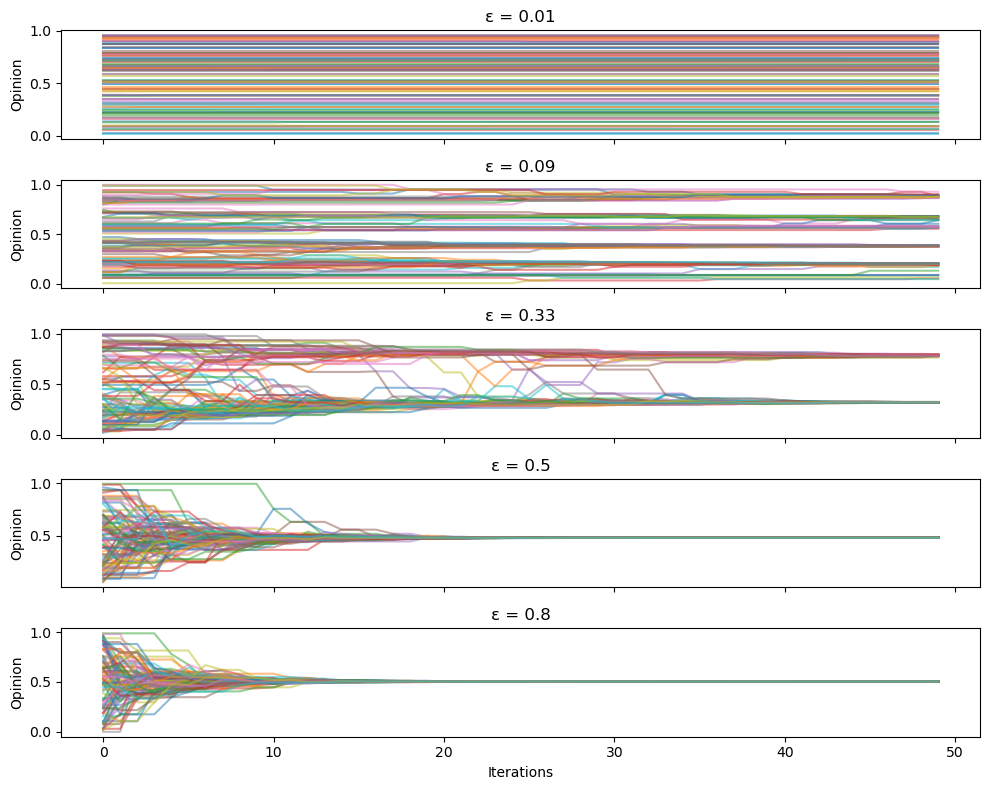

In [27]:
# Run simulations
histories = {eps: deffuant_simulation(pop_size, eps, iterations) for eps in epsilons}

# Create plots
fig, axes = plt.subplots(len(epsilons), 1, figsize=(10, 8), sharex=True)

for ax, (eps, history) in zip(axes, histories.items()):
    for i in range(pop_size):
        ax.plot(history[:, i], alpha=0.5)
    ax.set_title(f'ε = {eps}')
    ax.set_ylabel('Opinion')
    ax.label_outer()

axes[-1].set_xlabel('Iterations')
plt.tight_layout()
plt.show()

-Les résultats de l'expérience montrent que plus on prend une valeur de $\epsilon$ grande plus les opinions convergent au fil des itérations. 

-Le paramètre $\epsilon$ est décrit par Dino Pedreschi comme étant un *open mindness parameter*,litérallement: paramètre d'ouverture d'esprit.

# II - Influenceurs et réseaux sociaux:

-Dans cette partie, nous avons rajouté des influenceurs dans la population de base.

-Les influenceurs ont leur propre opinion et influencent celles des autres.

-Afin de modéliser cela, nous avons créer une classe permettant de faire la distinction entre les individus normaux et les influenceurs.

In [28]:
import random
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [29]:
# Classe pour représenter un individu dans la simulation
class Individual:
    def __init__(self, is_influencer=False):
        self.opinion          = random.random()
        self.is_influencer    = is_influencer
        self.weight           = 1.0   if not is_influencer else np.random.randint(2,8)
        
    def interact(self, others):
        # Un influenceur influe sur les opinions des autres
        if self.is_influencer:
            for other in others:
                #other.opinion += abs(self.opinion - other.opinion) * other.influenceability
                other.opinion = (self.weight*self.opinion + other.weight*other.opinion) / (self.weight+other.weight) 


La classe individu possède trois paramètres:

- Opinion.
- is_influenceur:  détermine si l'individu est un influenceur ou s'il ne l'est pas.
- weight:  variable aléatoire faisant référence au poids de l'influenceur.

La classe possède également une méthode interact qui prend un ensemble d'individus et les font intéragir avec l'influenceur. Celui-ci les manipule et influence leurs opinions de la manière suivante: $opinion_{k}= \frac{(opinion_{influenceur} \times w_{influenceur} + opinion_{k} \times w_{k})}{w_{influenceur} + w_{k}} \forall k \in N$

N étant la taille de la population influencée.

De cette manière, l'influenceur peut manipuler la population comme il le souhaite.

## Paramètres:

In [30]:
# Paramètres du modèle
population_size = 1000
num_influencers = 1 # Nombre d'influenceurs dans la population
num_iterations = 8000

## Création de la population:

In [31]:
# Créer la population initiale
population = [Individual(is_influencer = i < num_influencers) for i in range(population_size)]

## Fixation de l'influenceur:

In [32]:
population[0].opinion = 0.2

In [33]:
# Histoire des opinions pour chaque individu à des fins de visualisation
opinion_history = np.zeros((num_iterations, population_size))

# Simulation de l'évolution des opinions dans le temps
for iteration in range(num_iterations):
    for i, individual in enumerate(population):
        if individual.is_influencer:
            # L'influenceur sélectionne un groupe de n personnes au hasard pour interagir avec
            group = random.sample(population, k=random.randint(2, 5))  # Vous pouvez ajuster la taille du groupe
            individual.interact(group)
        opinion_history[iteration, i] = individual.opinion

## Résultats:

/tmp/ipykernel_78627/792200980.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Opinion')


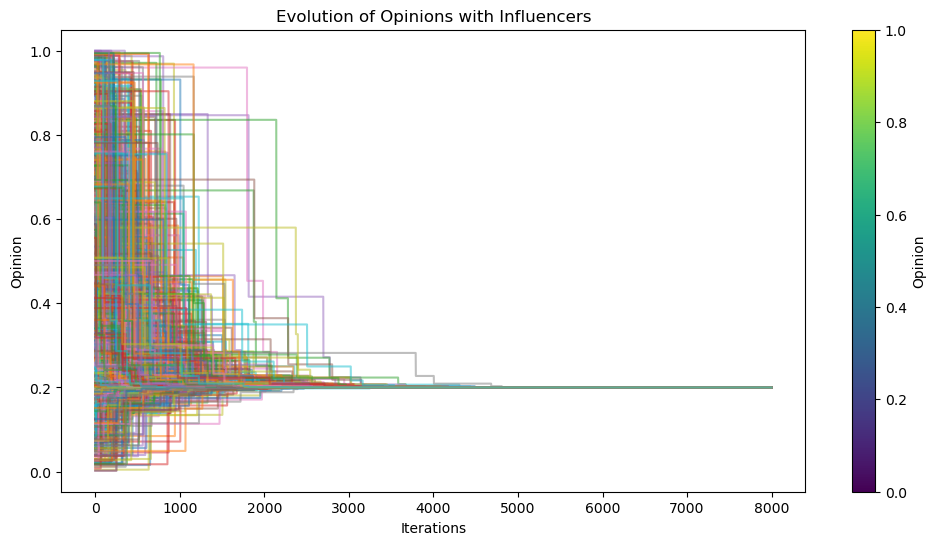

In [34]:
# Visualisation de l'évolution des opinions
plt.figure(figsize=(12, 6))
for i in range(population_size):
    plt.plot(opinion_history[:, i], alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Opinion')
plt.title('Evolution of Opinions with Influencers')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Opinion')
plt.show()

Nous pouvons également avoir plusieurs influenceurs à la fois dans une même population.

-La différence entre le cas de figure précédent est que le moment où un individu est manipulé par un influenceur il est marqué. Par conséquent, il ne pourra plus être manipulé par un autre influenceur

In [35]:
class Individual:
    def __init__(self, is_influencer=False):
        self.opinion          = random.random()
        self.is_influencer    = is_influencer
        self.weight           = 1.0   if not is_influencer else np.random.randint(2,8)
        self.influenced       = -1    if is_influencer else 0

    def interact(self, others):
        # Un influenceur influe sur les opinions des autres
        if self.is_influencer:
            for other in others:
                if(other.influenced == 0):
                    other.influenced = self.weight  
                if(other.influenced == self.weight):
                    #other.opinion += abs(self.opinion - other.opinion) * other.influenceability
                    other.opinion = (self.weight*self.opinion + other.weight*other.opinion) / (self.weight+other.weight) 

## Paramètres:

In [36]:
# Paramètres du modèle
population_size = 500 # Taille de la population
num_influencers = 2   # Nombre d'influenceurs dans la population
num_iterations = 5000 # Nombre d'itérations

## Fixation des influenceurs:

In [37]:
# Créer la population initiale
population = [Individual(is_influencer = i < num_influencers) for i in range(population_size)]
population[0].opinion = 0.1
population[0].weight  = 10

population[1].opinion = 0.8
population[1].weight  = 8

In [38]:
# Histoire des opinions pour chaque individu à des fins de visualisation
opinion_history = np.zeros((num_iterations, population_size))

# Simulation de l'évolution des opinions dans le temps
for iteration in range(num_iterations):
    for i, individual in enumerate(population):
        if individual.is_influencer:
            # L'influenceur sélectionne un groupe de n personnes au hasard pour interagir avec
            group = random.sample(population, k=random.randint(2, 5))  # Vous pouvez ajuster la taille du groupe
            individual.interact(group)
        opinion_history[iteration, i] = individual.opinion


## Résultats:

/tmp/ipykernel_78627/2246780099.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Opinion')


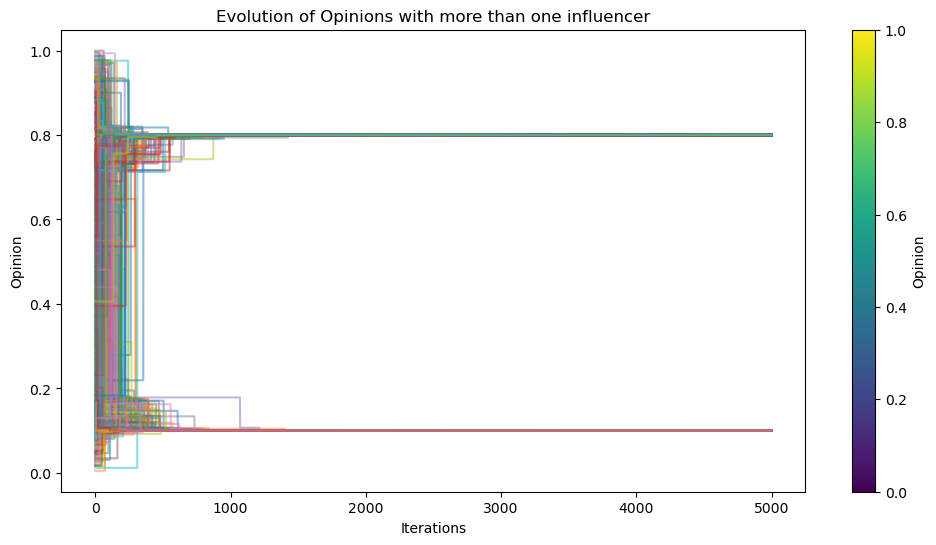

In [39]:
# Visualisation de l'évolution des opinions
plt.figure(figsize=(12, 6))
for i in range(population_size):
    plt.plot(opinion_history[:, i], alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Opinion')
plt.title('Evolution of Opinions with more than one influencer')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Opinion')
plt.show()

# III - convaincus:

Dans ce cas de figure, nous ajoutons une nouvelle dimension à la variable individu, à savoir: la conviction. En effet, il se peut qu'une personne soit totalement convaincue de son opinion et ne souhaite pas la changer. Nous avons donc implémenté un modèle simulant cela. 

-Avant de commencer, on part du principe que plus l'opinion de l'individu est éloigné du centre (0.5) plus il est convaincu.

\begin{equation}
  conviction_{i} =
    \begin{cases}
      1-opinion_{i} & \text{si $opinion_{i}$ < 0.3}\\
      opinion_{i} & \text{si $opinion_{i}$ > 0.7}\\
      \text{une valeur aléatoire entre 0 et 0.4} & \text{sinon}
    \end{cases}       
\end{equation}


In [40]:
# Classe pour représenter un individu dans la simulation
class Individual:
    def __init__(self):
        self.opinion = random.random()
        self.conviction = 0
        
    def init_conviction(self):
        if self.opinion <= 0.7 and self.opinion >= 0.3:
            self.conviction = random.uniform(0,0.4)
        else:
            if self.opinion > 0.7:
                self.conviction =  self.opinion
            elif self.opinion < 0.3:
                self.conviction = 1 - self.opinion

Le déroulement de l'algorithme est le suivant:

-On sélectionne aléatoirement deux individus.

-Pour chaque individu sélectionné on vérifie si sa conviction est en dessous de la borne supérieur. Si c'est le cas alors on met à jour l'opinion, sinon on passe à la suite. Aussi, si les individus sont assez proches, on augmente légèrement leurs convictions.

-La suite est la même que pour le modèle de base.

In [41]:
def convinced_model(epsilon,param1,param2):
    # Créer la population initiale
    population = [Individual() for i in range(population_size)]

    # Histoire des opinions pour chaque individu à des fins de visualisation
    opinion_history = np.zeros((num_iterations, population_size))
    conviction_history = np.zeros((num_iterations, population_size))
    
    opinion_history[0]    = [x.opinion for x in population]
    
    for individual in population:
        individual.init_conviction()
    
    conviction_history[0] = [x.conviction for x in population]
    # Simulation de l'évolution des opinions dans le temps
    for t in range(num_iterations):
        conviction_history[t] = [x.conviction for x in population]
        opinion_history[t]    = [x.opinion for x in population]
        for _ in range(population_size//2):
            i1, i2   = random.sample(range(population_size), 2)
            opinion1 = population[i1].opinion
            opinion2 = population[i2].opinion
            
            conviction1 = population[i1].conviction
            conviction2  = population[i2].conviction
            
            if abs(opinion1 - opinion2) < epsilon:
                    if (conviction1 < param1):
                        population[i1].opinion = (opinion1 + opinion2) / 2
                        if (abs(opinion1 - opinion2) < param2 and population[i1].conviction+0.1 < 1):
                            population[i1].conviction += 0.05
                    if (conviction2 < param1):
                        population[i2].opinion = (opinion1 + opinion2) / 2
                        if (abs(opinion1 - opinion2) < param2 and population[i2].conviction+0.1 < 1):
                            population[i2].conviction += 0.05
                        
    return opinion_history,conviction_history

## Paramètres:

Deux nouveaux paramètres apparaissent ici: bornesup et distmin.

-Bornesup: est la valeur de la conviction à partir de laquelle l'opinion d'un individu ne pourra plus être influencée.

-distmax: est la distance max en dessous de laquelle on considère que deux opinions sont proches. 


In [42]:
# Paramètres du modèle
population_size = 50
num_iterations  = 500
bornesup        = 0.8   
distmax         = 0.5
epsilon         = 0.4

In [43]:
opinion_history,conviction_history = convinced_model(epsilon,bornesup,distmax)

## Résultats:

/tmp/ipykernel_78627/488962070.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Opinion')


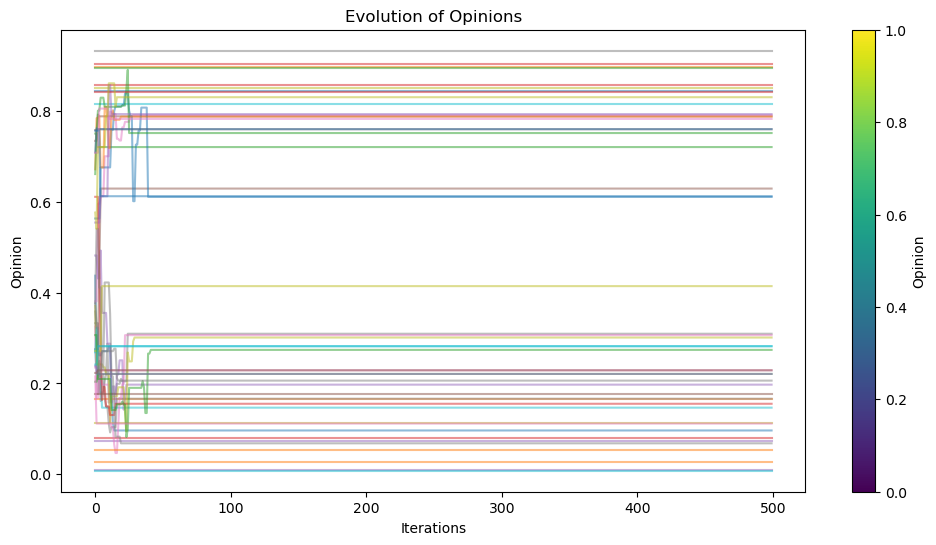

/tmp/ipykernel_78627/488962070.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Opinion')


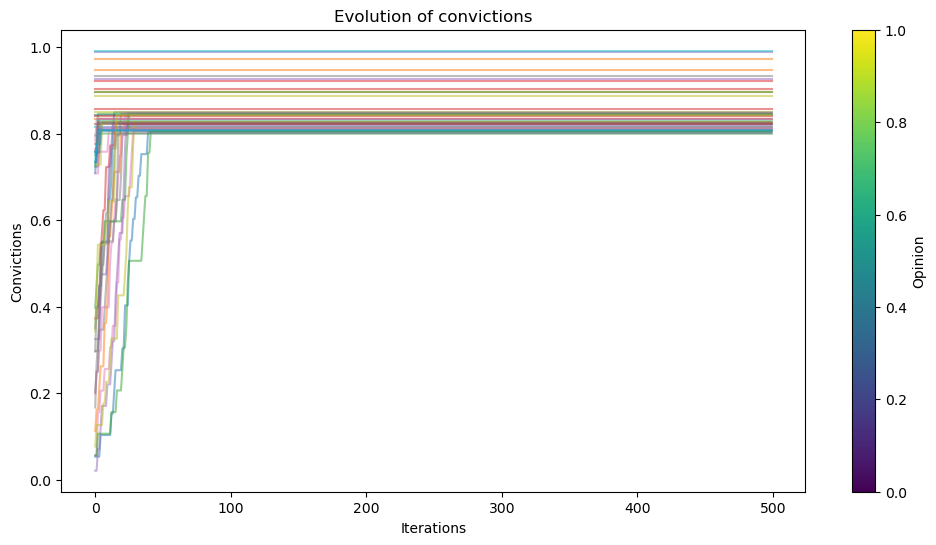

In [44]:

# Visualisation de l'évolution des opinions
plt.figure(figsize=(12, 6))
for i in range(population_size):
    plt.plot(opinion_history[:, i], alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Opinion')
plt.title('Evolution of Opinions')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Opinion')
plt.show()


# Visualisation de l'évolution des convictions
plt.figure(figsize=(12, 6))
for i in range(population_size):
    plt.plot(conviction_history[:, i], alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Convictions')
plt.title('Evolution of convictions')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Opinion')
plt.show()

# IV - Sujets clivants:

Quand il s'agit de sujets clivants, les avis sont plus tranchés et moins nuancés. Nous avons décidé de modéliser cela de la manière suivante:

In [45]:
class Individual:
    def __init__(self):
        self.opinion = random.random()

Le déroulement de l'algorithme est le suivant:

-On sélectionne deux individus aléatoirement.

-Si les opinions des deux individus sont simultanément en dessous ou au dessus de 0.5 on met à jour leurs opinions.

-Concernant la mise à jour des opinions, on fait en sorte que l'opinion la plus éloignée du centre influence l'autre opinion. De telle manière à ce que les individus avec les opinions les plus tranchées influencent ceux qui sont les plus proches d'eux.

In [46]:
def clivant_model(weight,center):
    # Créer la population initiale
    population = [Individual() for i in range(population_size)]

    # Histoire des opinions pour chaque individu à des fins de visualisation
    opinion_history = np.zeros((num_iterations, population_size))
    opinion_history[0]    = [x.opinion for x in population]
    
    # Simulation de l'évolution des opinions dans le temps
    for t in range(num_iterations):
        opinion_history[t]    = [x.opinion for x in population]
        for _ in range(population_size//2):
            i1, i2   = random.sample(range(population_size), 2)
            opinion1 = population[i1].opinion
            opinion2 = population[i2].opinion
            
            #print(opinion1,end=" ")
            #print(opinion2)
            #print()
            if (opinion1 < center and opinion2 < center) or (opinion1 > center and opinion2 > center):
                dist1    = abs(opinion1 - center)
                dist2    = abs(opinion2 - center)
                if(dist1 > dist2):
                    population[i2].opinion = ((weight * opinion1) + opinion2)/(weight+1)
                elif(dist2 > dist1):
                    population[i1].opinion = ((weight * opinion2) + opinion1)/(weight+1)
                    
    #print(opinion_history)
    return opinion_history,conviction_history

## paramètres:

In [47]:
weight = 1
center = 0.5
population_size = 800
num_iterations = 150

In [48]:
opinion_history,conviction_history = clivant_model(weight,center)

/tmp/ipykernel_78627/2208459388.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Opinion')


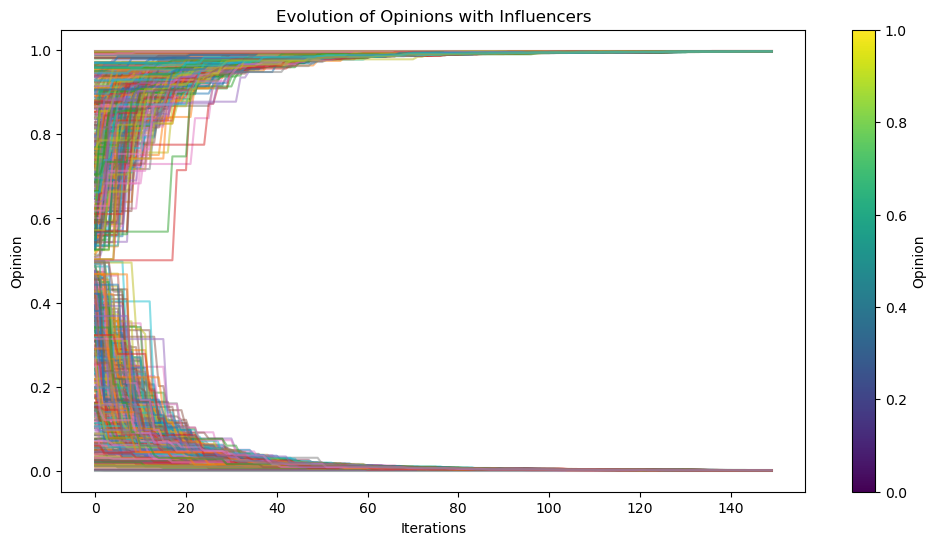

In [49]:
#print(conviction_history)
# Visualisation de l'évolution des opinions
plt.figure(figsize=(12, 6))
for i in range(population_size):
    plt.plot(opinion_history[:, i], alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Opinion')
plt.title('Evolution of Opinions with Influencers')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Opinion')
plt.show()